 python main.py --n-dims 256 --sigma 1 --norm-scale 0.1

python main.py --norm-scale 20

python main.py --norm-scale 10 --n-dims 256 --dropout 0.7 --sigma 10

python main.py --norm-scale 20 --n-eps 2

## FED-PUB + AUX

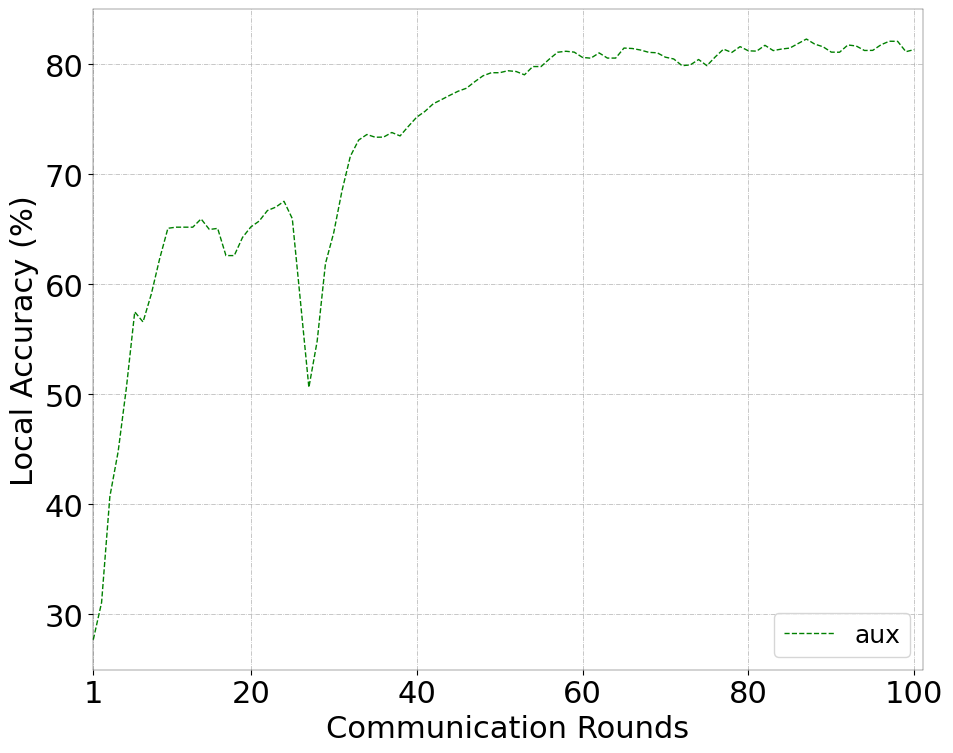

,model,Rnd @ Acc 80,Acc @ Rnd 100,Acc @ Best Val,Std @ Best Val,Acc @ Best Val All,Std @ Best Val All,Processed Rnds
0,aux,56,81.31,82.06,0.0,82.06,0.0,100


In [1]:
import os
import sys
import inspect
import os.path as osp
from evaluations.visualizer import *
dataset = 'Cora'
mode = 'disjoint'
num_clients = 10
model_name = 'aux'
Backbone = 'GCN'
time = '20250428_020058'
logs_dir = os.path.join('logs', f'{dataset}_{mode}', 'clients_' + str(num_clients))

def create_info(name, logs, viz):
    return {
        'name': name,
        'logs': [osp.join(logs_dir, log) for log in logs],
        'viz': viz,
    }

%matplotlib inline

upto = 100
target_acc = 80
interval_rnd = 20
models = [create_info(name = model_name,  # 保存多个model
                      logs=[f'{time}_{model_name}'], # 保存一个model的多次运行
                      viz = {'color': 'green', 'linewidth': 1, 'linestyle':'--', 'marker': 'o', 'markevery': interval_rnd, 'markersize': 0})]

plot_acc_over_round(models=models, upto=upto, opt={
    'plt_font_size': 22,
    'plt_line_width': 0.25,
    'plt_fig_size': (10,8),
    'plt_title': f'Performance on Cora with number of clients = {str(num_clients)}',
    'plt_y_label': 'Local Accuracy (%)',
    'plt_x_label': 'Communication Rounds',
    'plt_x_interval': interval_rnd,
    'plt_background_grid': True,
    'plt_legend_opt': {'ncol':2, 'fontsize': 18, 'loc': 'lower right'},
    'plt_save': f'plots/cora_{str(num_clients)}_{model_name}.pdf'
})

summary(
    models = models,
    upto = upto,
    target_acc = target_acc,
    target_rnd = upto
)